In [30]:
from collections import OrderedDict
import matplotlib.pyplot as plt

In [31]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X = iris.data
Y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.5)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
N_NEIGHBORS = 10

In [33]:
metrics = [('minkowski', 2), ('minkowski', 4), ('euclidean',), ('chebyshev',)]

def create_label(metric):
    name = metric[0]
    return '{}, p={}'.format(*metric) if name == 'minkowski' else name

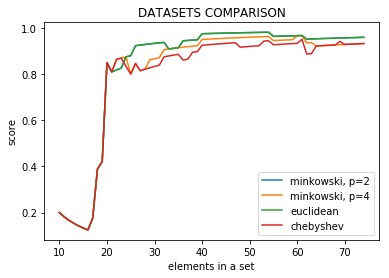

In [34]:
def score_by_dataset(rows, metric, p=2):
    classifier = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric=metric, p=p)
    classifier.fit(X_train[:rows], y_train[:rows])
    return classifier.score(X_test[:rows], y_test[:rows])

indices = range(10, len(X_train + 1))
for metric in metrics:
    results = {rows: score_by_dataset(rows, *metric) for rows in indices}
    results = OrderedDict(sorted(results.items()))
    plt.plot(list(results.keys()), list(results.values()), label=create_label(metric))
    
plt.title('DATASETS COMPARISON')
plt.xlabel('elements in a set')
plt.ylabel('score')
plt.legend()
plt.show()

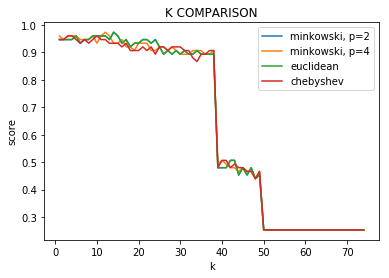

In [35]:
def score_by_k(k, metric, p=2):
    classifier = KNeighborsClassifier(n_neighbors=k, metric=metric, p=p)
    classifier.fit(X_train, y_train)
    return classifier.score(X_test, y_test)

ks = range(1, len(X_train + 1))
for metric in metrics:
    results = {k: score_by_k(k, *metric) for k in ks}
    results = OrderedDict(sorted(results.items()))
    plt.plot(list(results.keys()), list(results.values()), label=create_label(metric))
    
plt.title('K COMPARISON')
plt.xlabel('k')
plt.ylabel('score')
plt.legend()
plt.show()